In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_transform_cat_to_num.csv"


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

BP1_1,BP1_20,BP1_23,BP1_30,BP1_33,BP1_34,BP1_35,BP1_4,BP1_5,BPCOD,ESTRATO,BP1_3C
0.9695959,1,0.3785798,1,0.6694782,2.000000e-04,0.7477442,1.0000000,0.9750883,0.3979992,0.5474696,0.2722636
0.2722636,1,0.9905845,1,0.6694782,3.000000e-05,0.7477442,1.0000000,0.9750883,0.3979992,0.5474696,0.2722636
0.9695959,1,0.4284033,1,0.6694782,5.000001e-05,0.7477442,0.3434680,0.4619459,0.3979992,1.0000000,0.2722636
0.2722636,1,0.9246763,1,0.6694782,5.000001e-04,0.7477442,1.0000000,0.9750883,0.3979992,1.0000000,0.2722636
0.6447627,1,0.3785798,1,0.6694782,1.500000e-04,0.7477442,0.6926246,0.4619459,0.3979992,1.0000000,0.2722636
1.0000000,1,0.3785798,1,0.8601412,4.811678e-01,0.8275794,0.6926246,0.8238525,0.5317772,0.5474696,0.2722636


In [4]:
ncol(data)

[1] 12

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
BP1_1,2.4988330
BP1_20,0.3298835
BP1_23,1.8184757
BP1_30,0.2199585
BP1_33,0.9465725
BP1_34,4.6573739


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
6,BP1_34,4.657374
12,BP1_3C,2.722899
1,BP1_1,2.498833
7,BP1_35,2.146855
10,BPCOD,2.046298
3,BP1_23,1.818476


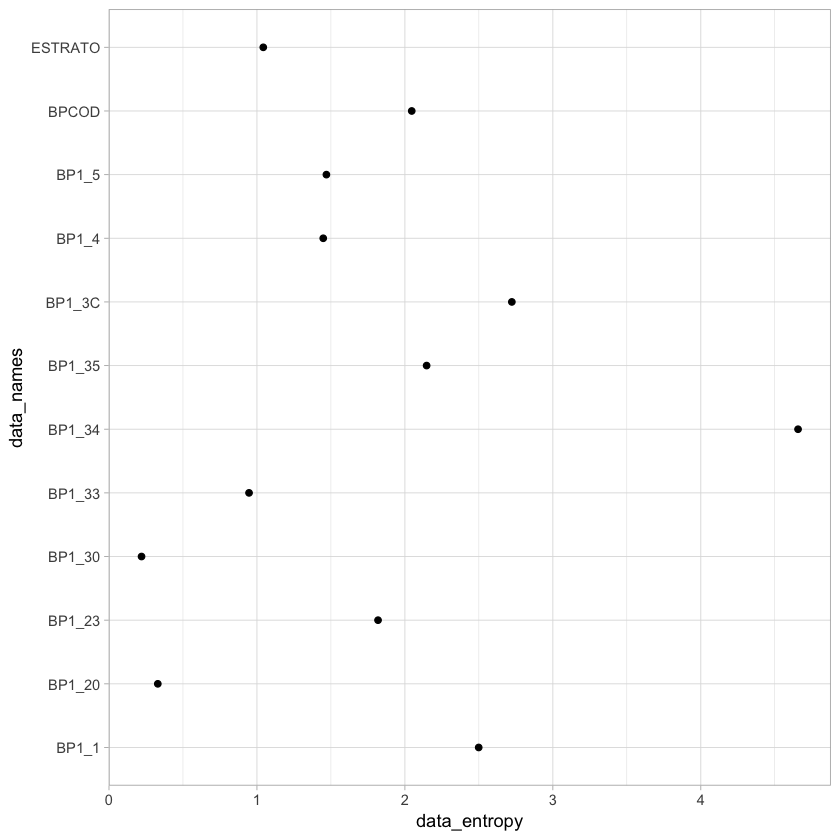

In [8]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

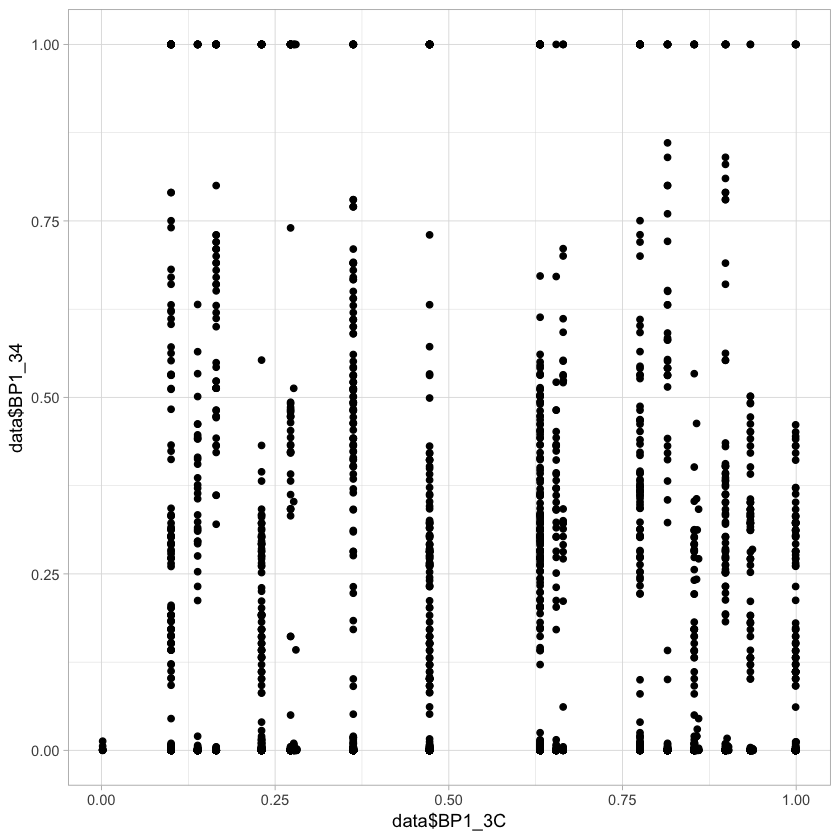

In [9]:
ggplot(data = data, 
       aes(y=data$BP1_34, 
           x=data$BP1_3C)) + geom_point() + theme_light()

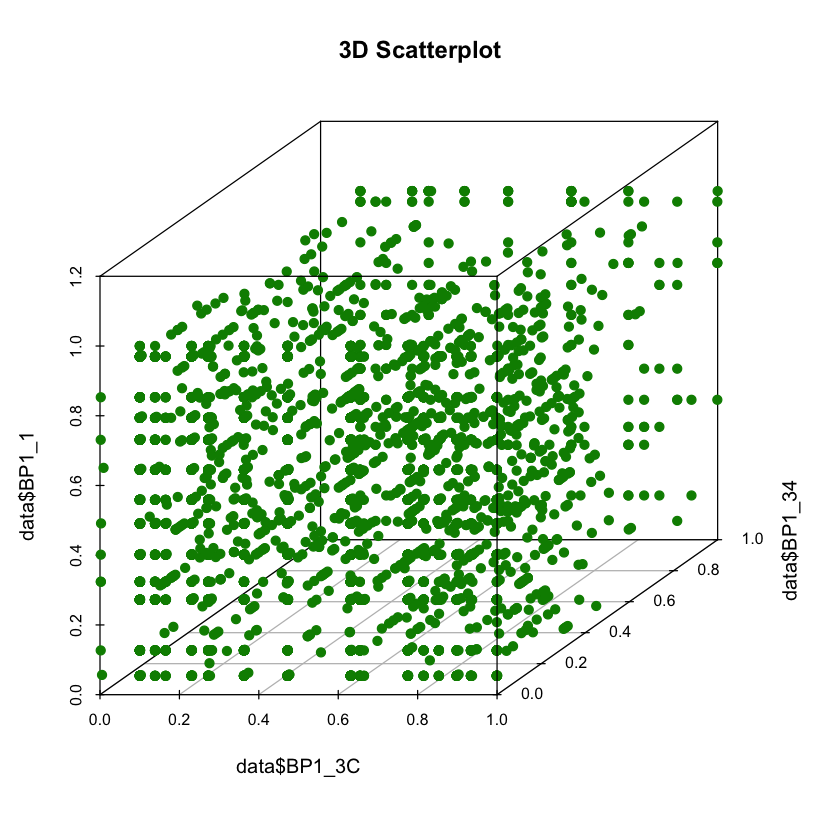

In [10]:
scatterplot3d(y=data$BP1_34, 
              x=data$BP1_3C,
              z=data$BP1_1, pch = 19, color = "green4", main="3D Scatterplot")


In [11]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_entropy_transform_categorical.csv"


In [12]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
